In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
path = os.getcwd()
path

'/home/alexhang/project/Nuclear'

In [5]:
# 导入处理好的数据
file_base_name = 'nuclear_burnup_data_20201215.csv'
file_input_name = 'df.csv'

pre_data_X = pd.read_csv(os.path.join(path, file_input_name), index_col=0)
pre_data_base = pd.read_csv(os.path.join(path, file_base_name))
pre_data_X.columns.values.tolist()  
pre_data_X

,kinf_1,kinf_2,kinf_3,kinf_4,kinf_5,kinf_6,kinf_7,kinf_8,kinf_9,kinf_10,...,NODE2DBU_95,NODE2DBU_96,NODE2DBU_97,NODE2DBU_98,NODE2DBU_99,NODE2DBU_100,NODE2DBU_101,NODE2DBU_102,NODE2DBU_103,NODE2DBU_104
0,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,0.0,0.0,36445.0,31803.0,36809.0,31836.0,20806.0,20806.0,20806.0,20806.0
1,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,0.0,0.0,36809.0,36445.0,31836.0,31803.0,20806.0,20806.0,20806.0,20806.0
2,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,0.0,0.0,31836.0,36809.0,31803.0,36445.0,20806.0,20806.0,20806.0,20806.0
3,1.21509,1.16662,1.07459,1.21975,1.4279,1.1821,1.15078,1.4279,1.1821,1.1821,...,0.0,0.0,31803.0,31836.0,36445.0,36809.0,20806.0,20806.0,20806.0,20806.0
4,1.16708,1.08099,1.18090,1.16216,1.4279,1.1821,1.08632,1.4279,1.1821,1.1821,...,0.0,0.0,26837.0,26864.0,26834.0,26862.0,22008.0,22008.0,22008.0,22008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,1.15988,1.07458,1.09861,1.15534,1.4279,1.1821,1.07427,1.4279,1.1821,1.1821,...,0.0,0.0,26191.0,26191.0,26200.0,26200.0,36146.0,36146.0,36146.0,36146.0
119996,1.09092,1.08161,1.07427,1.07583,1.4279,1.1821,1.09178,1.4279,1.1821,1.1821,...,0.0,0.0,43151.0,45258.0,39658.0,43091.0,36186.0,36186.0,36186.0,36186.0
119997,1.09092,1.08161,1.07427,1.07583,1.4279,1.1821,1.09178,1.4279,1.1821,1.1821,...,0.0,0.0,43091.0,39658.0,45258.0,43151.0,36186.0,36186.0,36186.0,36186.0
119998,1.19730,1.15417,1.21509,1.20422,1.4279,1.1821,1.06296,1.4279,1.1821,1.1821,...,0.0,0.0,31803.0,31836.0,36445.0,36809.0,25238.0,25238.0,25238.0,25238.0


In [10]:
pre_data_y = pre_data_base.iloc[:,-2:]
pre_data_y

,MaxAssBurnupCal,MaxPinBurnupCal
0,56624,62467.5
1,56812,61980.1
2,56724,62521.4
3,56537,62195.7
4,57424,64025.7
...,...,...
119995,57359,63599.1
119996,59562,64865.4
119997,59631,63716.2
119998,61714,65601.8


In [11]:
pre_data = pd.concat([pre_data_X, pre_data_y], axis=1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
pre_data_array = pre_data.values
mm = MinMaxScaler(feature_range=(0,1))
pre_data_Normalized = mm.fit_transform(pre_data_array)
pre_data_Normalized = pre_data_Normalized[:,:-2]
# pre_data_y = pre_data_Normalized[:,-2:]
print(pre_data_Normalized.shape)
print(pre_data_y.shape)

(120000, 156)
(120000, 2)


In [56]:
map1 = \
[
    [0,0,0,0,0,0,1,2,1,0,0,0,0,0,0],
    [0,0,0,0,3,4,5,6,5,4,3,0,0,0,0],
    [0,0,0,7,8,9,10,11,10,9,8,7,0,0,0],
    [0,0,7,12,13,14,15,16,15,14,13,12,7,0,0],
    [0,3,8,13,17,18,19,20,19,18,17,13,8,3,0],
    [0,4,9,14,18,21,22,23,22,21,18,14,9,4,0],
    [1,5,10,15,19,22,24,25,24,22,19,15,10,5,1],
    [2,6,11,16,20,23,25,26,25,23,20,16,11,6,2],
    [1,5,10,15,19,22,24,25,24,22,19,15,10,5,1],
    [0,4,9,14,18,21,22,23,22,21,18,14,9,4,0],
    [0,3,8,13,17,18,19,20,19,18,17,13,8,3,0],
    [0,0,7,12,13,14,15,16,15,14,13,12,7,0,0],
    [0,0,0,7,8,9,10,11,10,9,8,7,0,0,0],
    [0,0,0,0,3,4,5,6,5,4,3,0,0,0,0],
    [0,0,0,0,0,0,1,2,1,0,0,0,0,0,0]
    
]
m = np.array(map1)
print(m.shape)
map2 = \
[
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/0",'1/1','2/0','2/1','1/1','1/0',0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/2",'1/3','2/2','2/3','1/3','1/2',0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/0",'3/1','4/0','4/1','5/0','5/1','6/0','6/1',"3/1",'3/0','4/1','4/0','5/1','5/0',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/2",'3/3','4/2','4/3','5/2','5/3','6/2','6/3',"3/3",'3/2','4/3','4/2','5/3','5/2',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,'7/0','7/1',"8/0",'8/1','9/0','9/1','10/0','10/1','11/0','11/1',"10/1",'10/0','9/1','9/0','8/1','8/0','7/1','7/0',0,0,0,0,0,0],
    [0,0,0,0,0,0,'7/2','7/3',"8/2",'8/3','9/2','9/3','10/2','10/3','11/2','11/3',"10/3",'10/2','9/3','9/2','8/3','8/2','7/3','7/2',0,0,0,0,0,0],
    [0,0,0,0,'7/0','7/2','12/0','12/1',"13/0",'13/1','14/0','14/1','15/0','15/1','16/0','16/1',"15/1",'15/0','14/1','14/0','13/1','13/0','12/1','12/0','7/2','7/0',0,0,0,0],
    [0,0,0,0,'7/1','7/3','12/2','12/3',"13/2",'13/3','14/2','14/3','15/2','15/3','16/2','16/3',"15/3",'15/2','14/3','14/2','13/3','13/2','12/3','12/2','7/3','7/1',0,0,0,0],
    [0,0,"3/0","3/2",'8/0','8/2','13/0','13/2',"17/0",'17/1','18/0','18/1','19/0','19/1','20/0','20/1',"19/1",'19/0','18/1','18/0','17/1','17/0','13/2','13/0','8/2','8/0','3/2','3/0',0,0],
    [0,0,"3/1","3/3",'8/1','8/3','13/1','13/3',"17/2",'17/3','18/2','18/3','19/2','19/3','20/2','20/3',"19/3",'19/2','18/3','18/2','17/3','17/2','13/3','13/1','8/3','8/1','3/3','3/1',0,0],
    [0,0,"4/0","4/2",'9/0','9/2','14/0','14/2',"18/0",'18/2','21/0','21/1','22/0','22/1','23/0','23/1',"22/1",'22/0','21/1','21/0','18/2','18/0','14/2','14/0','9/2','9/0','4/2','4/0',0,0],
    [0,0,"4/1","4/3",'9/1','9/3','14/1','14/3',"18/1",'18/3','21/2','21/3','22/2','22/3','23/2','23/3',"22/3",'22/2','21/3','21/2','18/3','18/1','14/3','14/1','9/3','9/1','4/3','4/1',0,0],
    ['1/0','1/2',"5/0","5/2",'10/0','10/2','15/0','15/2',"19/0",'19/2','22/0','22/2','24/0','24/1','25/0','25/1',"24/1",'24/0','22/2','22/0','19/2','19/0','15/2','15/0','10/2','10/0','5/2','5/0','1/2','1/0'],
    ['1/1','1/3',"5/1","5/3",'10/1','10/3','15/1','15/3',"19/1",'19/3','22/1','22/3','24/2','24/3','25/2','25/3',"24/3",'24/2','22/3','22/1','19/3','19/1','15/3','15/1','10/3','10/1','5/3','5/1','1/3','1/1'],
    ['2/0','2/2',"6/0","6/2",'11/0','11/2','16/0','16/2',"20/0",'20/2','23/0','23/2','25/0','25/2','26/0','26/1',"25/2",'25/0','23/2','23/0','20/2','20/0','16/2','16/0','11/2','11/0','6/2','6/0','2/2','2/0'],
    ['2/1','2/3',"6/1","6/3",'11/1','11/3','16/1','16/3',"20/1",'20/3','23/1','23/3','25/1','25/3','26/2','26/3',"25/3",'25/1','23/3','23/1','20/3','20/1','16/3','16/1','11/3','11/1','6/3','6/1','2/3','2/1'],
    ['1/1','1/3',"5/1","5/3",'10/1','10/3','15/1','15/3',"19/1",'19/3','22/1','22/3','24/2','24/3','25/2','25/3',"24/3",'24/2','22/3','22/1','19/3','19/1','15/3','15/1','10/3','10/1','5/3','5/1','1/3','1/1'],
    ['1/0','1/2',"5/0","5/2",'10/0','10/2','15/0','15/2',"19/0",'19/2','22/0','22/2','24/0','24/1','25/0','25/1',"24/1",'24/0','22/2','22/0','19/2','19/0','15/2','15/0','10/2','10/0','5/2','5/0','1/2','1/0'],
    [0,0,"4/1","4/3",'9/1','9/3','14/1','14/3',"18/1",'18/3','21/2','21/3','22/2','22/3','23/2','23/3',"22/3",'22/2','21/3','21/2','18/3','18/1','14/3','14/1','9/3','9/1','4/3','4/1',0,0],
    [0,0,"4/0","4/2",'9/0','9/2','14/0','14/2',"18/0",'18/2','21/0','21/1','22/0','22/1','23/0','23/1',"22/1",'22/0','21/1','21/0','18/2','18/0','14/2','14/0','9/2','9/0','4/2','4/0',0,0],
    [0,0,"3/1","3/3",'8/1','8/3','13/1','13/3',"17/2",'17/3','18/2','18/3','19/2','19/3','20/2','20/3',"19/3",'19/2','18/3','18/2','17/3','17/2','13/3','13/1','8/3','8/1','3/3','3/1',0,0],
    [0,0,"3/0","3/2",'8/0','8/2','13/0','13/2',"17/0",'17/1','18/0','18/1','19/0','19/1','20/0','20/1',"19/1",'19/0','18/1','18/0','17/1','17/0','13/2','13/0','8/2','8/0','3/2','3/0',0,0],
    [0,0,0,0,'7/1','7/3','12/2','12/3',"13/2",'13/3','14/2','14/3','15/2','15/3','16/2','16/3',"15/3",'15/2','14/3','14/2','13/3','13/2','12/3','12/2','7/3','7/1',0,0,0,0],
    [0,0,0,0,'7/0','7/2','12/0','12/1',"13/0",'13/1','14/0','14/1','15/0','15/1','16/0','16/1',"15/1",'15/0','14/1','14/0','13/1','13/0','12/1','12/0','7/2','7/0',0,0,0,0],
    [0,0,0,0,0,0,'7/2','7/3',"8/2",'8/3','9/2','9/3','10/2','10/3','11/2','11/3',"10/3",'10/2','9/3','9/2','8/3','8/2','7/3','7/2',0,0,0,0,0,0],
    [0,0,0,0,0,0,'7/0','7/1',"8/0",'8/1','9/0','9/1','10/0','10/1','11/0','11/1',"10/1",'10/0','9/1','9/0','8/1','8/0','7/1','7/0',0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/2",'3/3','4/2','4/3','5/2','5/3','6/2','6/3',"3/3",'3/2','4/3','4/2','5/3','5/2',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,"3/0",'3/1','4/0','4/1','5/0','5/1','6/0','6/1',"3/1",'3/0','4/1','4/0','5/1','5/0',0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/2",'1/3','2/2','2/3','1/3','1/2',0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,"1/0",'1/1','2/0','2/1','1/1','1/0',0,0,0,0,0,0,0,0,0,0,0,0],
      
]
m = np.array(map2)
print(m.shape)

(15, 15)
(30, 30)


In [57]:
def search(a,alist):
    res = []
    for i in range(len(alist)):
        for j in range(len(alist[i])):
            if alist[i][j] == a:
                res.append((i,j))
    return res

In [58]:
#排布input
def search(a,alist):
    res = []
    for i in range(len(alist)):
        for j in range(len(alist[i])):
            if alist[i][j] == a:
                res.append((i,j))
    return res
new = []
for i,item in enumerate(pre_data_Normalized):
    print("正在处理第 "+i+' 个图像..')
    layer1 = [[0 for _ in range(15)] for _ in range(15)]
    layer2 = [[0 for _ in range(15)] for _ in range(15)]
    layer3 = [[0 for _ in range(30)] for _ in range(30)]
#     print(item)
    for j in range(item.size): #len = 156
        if j < 26:
            res = search(j+1,map1)
            for u in res:
                h,w = u[0],u[1]
                layer1[h][w] = item[j]
        elif j < 52:
            j_ = j-26
            res = search(j_+1,map1)
            for u in res:
                h,w = u[0],u[1]
                layer2[h][w] = item[j]
            
        else:
            j_ = j-52
            number = str(j_ // 4 + 1)
            corner = str(j_ % 4)
            number_corner = number + '/' + corner
            res = search(number_corner,map2)
            for u in res:
                h,w = u[0],u[1]
                layer3[h][w] = item[j]
    layer1_array = np.array(layer1)
    layer2_array = np.array(layer2)
    layer3_array = np.array(layer3)
    
    #从1*1扩展成2*2
    layer1_array = np.repeat(layer1_array,2,axis = 1) 
    layer1_array = np.repeat(layer1_array,2,axis = 0)
    layer2_array = np.repeat(layer2_array,2,axis = 1)
    layer2_array = np.repeat(layer2_array,2,axis = 0)
    
    #channel 拼接
    tmp = np.stack((layer1_array,layer2_array,layer3_array),axis = 2)
    new.append(tmp)

pre_data_x = np.array(new)
print(pre_data_x.shape)
       

(120000, 30, 30, 3)


In [53]:
l = [1,"a"]
l

[1, 'a']

In [68]:
# pre_data_x = pre_data_x.reshape((pre_data_x.shape[0], pre_data_x.shape[1], pre_data_x.shape[2], 1))
# print(pre_data_x.shape)

(120000, 6, 26, 1)


In [59]:
print(pre_data_x.shape)
print(pre_data_y.shape)
pre_data_y = np.array(pre_data_y)
data = (pre_data_x,pre_data_y)
# pre_data_y.type

(120000, 30, 30, 3)
(120000, 2)


In [60]:
!nvidia-smi

Tue Jan 12 16:56:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 440.82       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 2070    Off  | 00000000:17:00.0 Off |                  N/A |
| 29%   34C    P8     8W / 175W |   1116MiB /  7982MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [63]:
# from keras.applications.resnet18 import ResNet18
# from keras.applications.resnet18 import preprocess_input as preprocess_input_resnet
import keras
def deeper_conv2D(h,w):
    new_model = keras.Sequential()
    new_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(2,2), strides=(2,2), padding="same", activation="relu", \
                                         input_shape=(h, w, 3)))
    new_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
    new_model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
    # Flatten will take our convolution filters and lay them out end to end so our dense layer can predict based on the outcomes of each
    new_model.add(tf.keras.layers.Flatten())
    new_model.add(tf.keras.layers.Dense(1000, activation='relu'))
    new_model.add(tf.keras.layers.Dense(100))
    new_model.add(tf.keras.layers.Dense(1))
    new_model.compile(optimizer="adam", loss="mean_squared_error")    
    return new_model
m = deeper_conv2D(pre_data_x.shape[1],pre_data_x.shape[2])
m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 15, 15, 16)        208       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        2080      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 15, 15, 64)        8256      
_________________________________________________________________
flatten_1 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              14401000  
_________________________________________________________________
dense_4 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split
seed = 2020
x_pre_train, x_test, y_pre_train, y_test = train_test_split(pre_data_x, pre_data_y, 
                                                           random_state=seed, train_size=0.9, 
                                                           test_size=0.1)

In [65]:
model = m.fit(x_pre_train,  y_pre_train[:,0], epochs=150)

Epoch 1/150
3375/3375 [==============================] - 204s 61ms/step - loss: 27701910.0000
Epoch 2/150
3375/3375 [==============================] - 271s 80ms/step - loss: 2284708.5000
Epoch 3/150
3375/3375 [==============================] - 270s 80ms/step - loss: 1823101.6250
Epoch 4/150
3375/3375 [==============================] - 270s 80ms/step - loss: 1329517.2500
Epoch 5/150
3375/3375 [==============================] - 269s 80ms/step - loss: 1017234.0625
Epoch 6/150
3375/3375 [==============================] - 268s 80ms/step - loss: 814674.1250
Epoch 7/150
3375/3375 [==============================] - 265s 79ms/step - loss: 575187.5000
Epoch 8/150
3375/3375 [==============================] - 266s 79ms/step - loss: 397913.4062
Epoch 9/150
3375/3375 [==============================] - 266s 79ms/step - loss: 277159.1562
Epoch 10/150
3375/3375 [==============================] - 265s 79ms/step - loss: 233927.9062
Epoch 11/150
3375/3375 [==============================] - 266s 79ms/step 

In [92]:
y_test[:,0]
# array([57732., 49679., 54567., ..., 57982., 57080., 56720.])

array([57732., 49679., 54567., ..., 57982., 57080., 56720.])

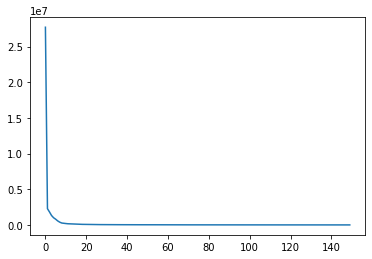

In [66]:
plt.plot(model.history["loss"])

In [67]:
m.evaluate(x_test, y_test, verbose=0)

14448786.0

In [68]:
output_col = ['v']
columns=output_col
pred_test = m.predict(x_test)
pred_test = pd.DataFrame(pred_test,columns=output_col)
y_test = pd.DataFrame(y_test[:,0],columns=output_col)
y_test

,v
0,57732.0
1,49679.0
2,54567.0
3,56139.0
4,62291.0
...,...
11995,59847.0
11996,57746.0
11997,57982.0
11998,57080.0


In [75]:
print('MaxAssBurnupCal')
print("")
def CalError(pred, test):
    
    col_name = []
    for col in pred.columns:
        col_name.append(col+'_pred')
    for col in test.columns:
        col_name.append(col+'_test')  
    
    pred.index = test.index
    pred_error = pd.concat([pred,test], axis=1)
    print(pred_error)
    pred_error.columns = col_name
    
    error_col = []
    for col in pred.columns:
        pred_error[col + '_error'] = np.array(pred[col]) - np.array(test[col])
        error_col.append(col + '_error')
    bin_range = np.linspace(0,1000,11).tolist() + [2000, 3000, 4000, 5000, 10000]
    bin_label = np.linspace(1,15,15).tolist()
    
    range_col = []
    for col in error_col:
        pred_error[col+'_range'] = pd.cut(
                                        abs(np.array(pred_error[col])),
                                        bins=bin_range
                                        )
        range_col.append(col+'_range')
        pred_error[col+'_label'] = pd.cut(
                                        abs(np.array(pred_error[col])),
                                        bins=bin_range,
                                        labels=bin_label
                                        )
        range_col.append(col+'_label')
        
    for col in [c for c in range_col if '_label' not in c]:
        print('{}特征误差范围及统计个数'.format(col))
        print(pred_error[col].value_counts())
        
    return pred_error
        
pred_error = CalError(pred_test[output_col], y_test[output_col])
pred_error
        
        

MaxAssBurnupCal

                  v        v
0      57721.691406  57732.0
1      49521.343750  49679.0
2      54464.921875  54567.0
3      55912.726562  56139.0
4      62067.667969  62291.0
...             ...      ...
11995  59567.546875  59847.0
11996  57577.855469  57746.0
11997  57917.683594  57982.0
11998  57017.367188  57080.0
11999  56538.316406  56720.0

[12000 rows x 2 columns]
v_error_range特征误差范围及统计个数
(100.0, 200.0]       5248
(200.0, 300.0]       3786
(0.0, 100.0]         2059
(300.0, 400.0]        800
(400.0, 500.0]         92
(500.0, 600.0]         11
(3000.0, 4000.0]        1
(1000.0, 2000.0]        1
(800.0, 900.0]          1
(600.0, 700.0]          1
(5000.0, 10000.0]       0
(4000.0, 5000.0]        0
(2000.0, 3000.0]        0
(900.0, 1000.0]         0
(700.0, 800.0]          0
Name: v_error_range, dtype: int64


,v_pred,v_test,v_error,v_error_range,v_error_label
0,57721.691406,57732.0,-10.308594,"(0.0, 100.0]",1.0
1,49521.343750,49679.0,-157.656250,"(100.0, 200.0]",2.0
2,54464.921875,54567.0,-102.078125,"(100.0, 200.0]",2.0
3,55912.726562,56139.0,-226.273438,"(200.0, 300.0]",3.0
4,62067.667969,62291.0,-223.332031,"(200.0, 300.0]",3.0
...,...,...,...,...,...
11995,59567.546875,59847.0,-279.453125,"(200.0, 300.0]",3.0
11996,57577.855469,57746.0,-168.144531,"(100.0, 200.0]",2.0
11997,57917.683594,57982.0,-64.316406,"(0.0, 100.0]",1.0
11998,57017.367188,57080.0,-62.632812,"(0.0, 100.0]",1.0
